# Average property price data analysis

by **Bradley Aldous**

## Contents

 1. [Data Preparation](#first)
      1. [Loading the dataset](#1a)
      1. [Separating the region data from the area data](#1b)
      1. [Assigning areas to regions](#1c)
      1. [Dealing with missing values](#1d)
      
 2. [Trends](#second)
      1. [Plotting trends of prices for flats and detached properties](#2a)
      1. [Comparisons of trends](#2b)
      
 3. [Price Changes](#third)
      1. [Change in prices of flats](#3a)
      1. [Visualising the change](#3b)
      1. [Conclusions](#3c)

 4. [Statistical Analysis](#fourth)
      1. [Cross-tabulation of price increase and decrease](#4a)
      1. [Chi-square test](#4b)
      1. [Final conclusions](#4c)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

## Part 1: Data Preparation <a class="anchor" id="first"></a>

Our dataset contains information on the average price of properties over a 3 year period in different areas of the country. The types of properties included in this dataset are flats, detached, semi-detached and terraced houses. We also have a second dataset telling us which one of the nine regions each area in our data belongs to. We can combine these datasets to allow us to analyse trends in the prices of properties in England.

The regions in our dataset are: East Midlands, East of England, London, North East, North West, South East, South West, West Midlands, and Yorkshire and the Humber. Each of these regions is comprised of a number of areas defined as being local government areas, of which there are four different types, denoted by the three digit prefix (E10, E09, E08 or E06). These are counties, London boroughs, Metropolitan boroughs and English unitary authorities respectively, though this distinction is not of importance in our analysis.

In this section, we load our datasets and perform some preparations on them so that they take a format that is beneficial for our analyses. We also identify the location of any missing values and decide how to deal with these before moving on further.

### A: Loading the dataset <a class="anchor" id="1a"></a>

Firstly, we load the 'average-property-price.csv' dataset into a data frame called 'prices' and we can reformat the 'Date' column such that the data is now of the datetime type and renamed 'Month'.

In [2]:
prices = pd.read_csv('average-property-price.csv')
prices = prices.assign(Month = pd.to_datetime(prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)
prices

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


### B: Separating the region data from the area data <a class="anchor" id="1b"></a>

We can see from this that the dataframe includes region data (with a prefix of 'E12') as well as area data. This data can then be separated such that we have a dataframe called 'area' which includes all area data, and another dataframe called 'region' which includes the region data.

In [3]:
area = prices.loc[~prices['Code'].str.contains('E12')]
area

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


In [4]:
region = prices.loc[prices['Code'].str.contains('E12')]
region

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


### C: Assigning areas to regions <a class="anchor" id="1c"></a>

We can load the second dataset 'location-codes.csv' and store it in a new data frame called 'codes'.

In [5]:
codes = pd.read_csv('location-codes.csv')
codes

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


We can then merge 'codes' with our data frame 'area' such that two new columns are added, displaying the region name and code for every row in 'area'.

In [6]:
area = pd.merge(area, codes, left_on=['Code'], right_on=['AuthorityCode'])
area = area.drop(['AuthorityCode', 'AuthorityName'], axis=1)
area

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionCode,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,E12000001,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,E12000001,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,E12000001,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,E12000001,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,E12000001,North East
...,...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,E12000005,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,E12000005,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,E12000005,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,E12000005,West Midlands


### D: Dealing with missing values <a class="anchor" id="1d"></a>

We can see from the display below that there are 92 missing values in our 'area' data frame. But before deciding to drop or replace these missing values we must first distinguish what data is actually missing. We can display all rows that contain missing values to allow us to decide what to do with the data, the table below contains all of these rows.

In [7]:
area.isnull().sum()

Area           0
Code           0
Detached      36
Semi          36
Terraced      20
Flat           0
Month          0
RegionCode     0
RegionName     0
dtype: int64

In [8]:
area_null = area[area.isna().any(axis=1)]
area_null

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionCode,RegionName
3276,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,2016-09-01,E12000007,London
3277,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,2016-10-01,E12000007,London
3278,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,2016-11-01,E12000007,London
3279,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,2016-12-01,E12000007,London
3280,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,2017-01-01,E12000007,London
3281,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,2017-02-01,E12000007,London
3282,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,2017-03-01,E12000007,London
3283,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,2017-04-01,E12000007,London
3284,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,2017-05-01,E12000007,London
3285,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,2017-06-01,E12000007,London


We can see from this, that all missing values in the dataset belong to the 'City of London' area. This is likely due to the fact that the borough, City of London, is very central and as such is a highly industrial/commercial area. Not many people live in this borough, and most, if not all, residential properties will be flat (very few houses).

However, the data of concern to us in the 'area' data frame is the average price of flats, as this is the variable we will be exploring later on. From the above, we can see that the 'Flat' column contains no missing values, so there is actually no need for us to drop the rows with missing values as this will only narrow and hinder our analysis later.

We will also be using the 'region' data frame in an analysis in the next section, but the below shows us that there are no missing values here, so no more work needs to be done on preparing the data.

In [9]:
region.isnull().sum()

Area        0
Code        0
Detached    0
Semi        0
Terraced    0
Flat        0
Month       0
dtype: int64

## Part 2: Trends <a class="anchor" id="second"></a>

In this section, we use the region data to help us visualise how the average price of flats and detached properties varies with time for each of the nine regions.

### A: Plotting trends of prices for flats and detached properties <a class="anchor" id="2a"></a>

We can use our 'region' data to help us produce plots of the change in the average price of flats and detached properties for each of the nine regions over the 3 year period our data is comprised of. I have done this below, producing one plot for each region, containing dual y-axes; one for flats and one for detached. This allows you to compare the relationships better as otherwise the trends aren't very visible due to the large difference in average price.

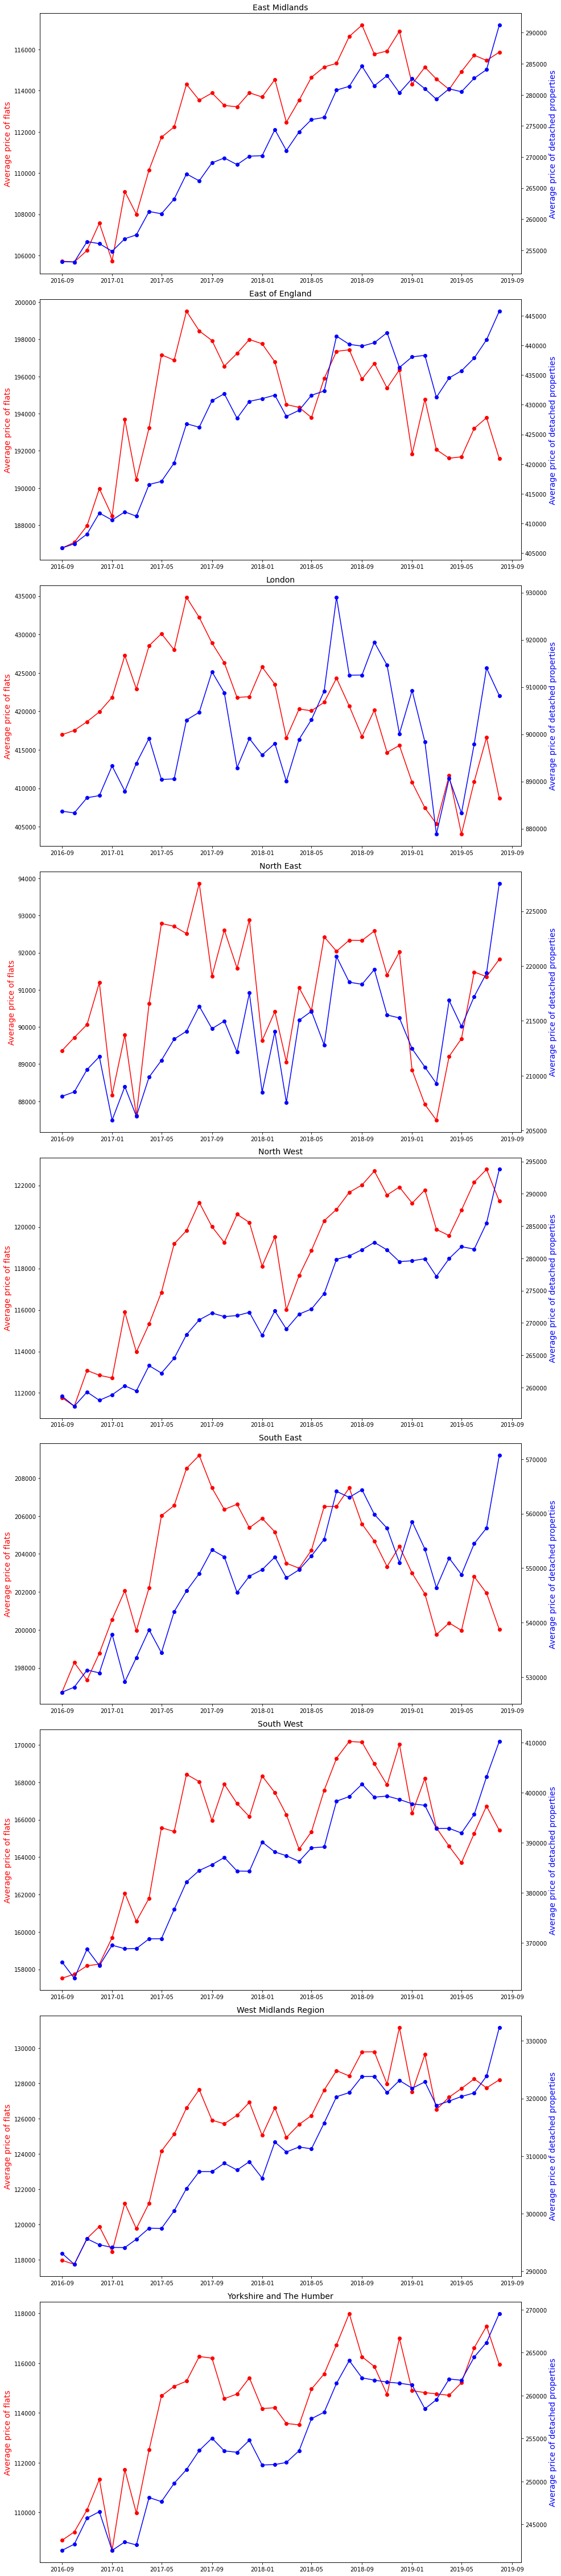

In [10]:
region_list = sorted(region['Area'].unique().tolist())

fig, ax = plt.subplots(nrows=len(region_list), figsize=(13.8,len(region_list)*7))

for i in region_list:
    ind = region_list.index(i)
    filt = region['Area'] == i
    ax2 = ax[ind].twinx()
    ax[ind].plot(region.loc[filt]['Month'],region.loc[filt]['Flat'], color='red', marker='o')
    ax[ind].set_ylabel('Average price of flats', color='red', fontsize=14)
    ax2.plot(region.loc[filt]['Month'],region.loc[filt]['Detached'],color='blue',marker='o')
    ax2.set_ylabel('Average price of detached properties',color='blue',fontsize=14)
    ax[ind].set_title(i, size=14)
    ax[ind].xaxis.set_tick_params(labelsize=10)
    ax[ind].yaxis.set_tick_params(labelsize=10)

plt.tight_layout()

### B: Comparison of trends <a class="anchor" id="2b"></a>

Firstly, commenting on the broad shape of the graphs, we can see that in all regions the price of both flats and detached properties increased significantly throughout 2017, reaching a peak around September 2017. In almost all cases, apart from detached properties in the East Midlands, the property price starts to decline reaching a minimum between December 2017 and March 2018. Following on from this, in almost all case the property price begins to increase again, reaching a new peak between September and December 2018, after which another decline begins; reaching a minimum in Spring/Summer 2019. Again, after this the property price starts climbing again up to September 2019 where our data ends.

Analysing this a little bit deeper, we can see that this follows a general annual fluctuation. The property price will typically start to increase in the Summer (around May), reaching an Autumn peak (around September), after which it will begin to drop until Summer. One reason for this fluctuation may be due to the impact of the academic year, such that property prices will increase around the time that students are looking to relocate to new cities for study.

Focusing in on specific regions, we can see that in a lot of cases the property price has increased over the 3 year period. Some regions such as Yorkshire and the Humber, West Midlands, South West, North West, and the East Midlands have undergone a clear gradual appreciation in property price whilst the other regions; South East, North East, London, and the East of England have experienced a far more turbulent price change over this time period. London has a particularly unique feature in its graph, in that the average price of flats in London is actually less in September 2019 than three years earlier, in stark contrast to all other regions, where the prices have a net increase over the three years. Though this minimum average price of flats in London is still vastly more expensive than the maximum average price of flats in any of the other regions; the closest region price-wise being the South East with a peak of £200,000 (for comparison, the London minimum in September 2019 is roughly £410,000 - more than double the South East peak). Perhaps this decline in London flat prices is due to the very high prices in this area, leading some people to look at other means of accommodation, thus lessening the demand on property. 

## Part 3: Price Changes <a class="anchor" id="third"></a>

In this section, we calculate the change in the price of flats between July 2017 and July 2018. We then use this to help us visualise how the change in price varies between areas within each of the nine regions, allowing us to identify any patterns and trends in the data.

### A: Change in prices of flats <a class="anchor" id="3a"></a>

To calculate the change in price of flats we need to narrow our data frame to include only the necessary data. We are calculating the change of price between July 2017 and July 2018, so we only need the data for these two months. So we created a new data frame 'df', which is a duplicate of 'area' but contains only the data for July 2017 and July 2018. We can also drop the 'Semi', 'Detached' and 'Terraced' columns, leaving only the 'Flat' price column.

In [11]:
df = area[area['Month'].isin(['2017-07-01', '2018-07-01'])]
df = df.drop(['Detached', 'Semi', 'Terraced'], axis=1)
df

,Area,Code,Flat,Month,RegionCode,RegionName
10,Hartlepool,E06000001,65007.84170,2017-07-01,E12000001,North East
22,Hartlepool,E06000001,61116.82158,2018-07-01,E12000001,North East
46,Middlesbrough,E06000002,69163.06963,2017-07-01,E12000001,North East
58,Middlesbrough,E06000002,69313.90788,2018-07-01,E12000001,North East
82,Redcar and Cleveland,E06000003,65507.80990,2017-07-01,E12000001,North East
...,...,...,...,...,...,...
5350,Warwickshire,E10000031,167470.71860,2018-07-01,E12000005,West Midlands
5374,West Sussex,E10000032,193547.45490,2017-07-01,E12000008,South East
5386,West Sussex,E10000032,191835.79530,2018-07-01,E12000008,South East
5410,Worcestershire,E10000034,127758.55150,2017-07-01,E12000005,West Midlands


Because we want to create a table of a different format to the dataframes above, we need to split 'df' into two separate data frames; one containing the data for July 2017 called 'df17' and another containing the data for July 2018 called 'df18'.

In [12]:
split_date = '2017-09-01'
df17 = df.loc[df['Month'] < split_date]
df17 = df17.drop(['Month'], axis=1)
df17 = df17.rename(columns={'Flat': 'Flat2017'})
df17

,Area,Code,Flat2017,RegionCode,RegionName
10,Hartlepool,E06000001,65007.84170,E12000001,North East
46,Middlesbrough,E06000002,69163.06963,E12000001,North East
82,Redcar and Cleveland,E06000003,65507.80990,E12000001,North East
118,Stockton-on-Tees,E06000004,83599.32806,E12000001,North East
154,Darlington,E06000005,87041.37973,E12000001,North East
...,...,...,...,...,...
5266,Suffolk,E10000029,140278.18370,E12000006,East of England
5302,Surrey,E10000030,270116.52610,E12000008,South East
5338,Warwickshire,E10000031,165676.94800,E12000005,West Midlands
5374,West Sussex,E10000032,193547.45490,E12000008,South East


In [13]:
df18 = df.loc[df['Month'] > split_date]
df18 = df18.drop(['Month'], axis=1)
df18 = df18.rename(columns={'Flat': 'Flat2018'})
df18

,Area,Code,Flat2018,RegionCode,RegionName
22,Hartlepool,E06000001,61116.82158,E12000001,North East
58,Middlesbrough,E06000002,69313.90788,E12000001,North East
94,Redcar and Cleveland,E06000003,64802.79724,E12000001,North East
130,Stockton-on-Tees,E06000004,83654.55272,E12000001,North East
166,Darlington,E06000005,83679.31818,E12000001,North East
...,...,...,...,...,...
5278,Suffolk,E10000029,142488.46480,E12000006,East of England
5314,Surrey,E10000030,267144.69100,E12000008,South East
5350,Warwickshire,E10000031,167470.71860,E12000005,West Midlands
5386,West Sussex,E10000032,191835.79530,E12000008,South East


We can now merge these two data frames into a new one called 'df17_18', which contains the average price of flats for every area in the dataset for July 2017, in one column, and July 2018 in another.

In [14]:
df17_18 = pd.merge(df17, df18, left_on=['Area', 'Code', 'RegionCode', 'RegionName'], right_on=['Area', 'Code', 'RegionCode', 'RegionName'])
df17_18

,Area,Code,Flat2017,RegionCode,RegionName,Flat2018
0,Hartlepool,E06000001,65007.84170,E12000001,North East,61116.82158
1,Middlesbrough,E06000002,69163.06963,E12000001,North East,69313.90788
2,Redcar and Cleveland,E06000003,65507.80990,E12000001,North East,64802.79724
3,Stockton-on-Tees,E06000004,83599.32806,E12000001,North East,83654.55272
4,Darlington,E06000005,87041.37973,E12000001,North East,83679.31818
...,...,...,...,...,...,...
146,Suffolk,E10000029,140278.18370,E12000006,East of England,142488.46480
147,Surrey,E10000030,270116.52610,E12000008,South East,267144.69100
148,Warwickshire,E10000031,165676.94800,E12000005,West Midlands,167470.71860
149,West Sussex,E10000032,193547.45490,E12000008,South East,191835.79530


A new column 'PriceChange' is created and contains the change in the average price of flats for each area between July 2017 and July 2018. This calculation is just done by subtracting the column 'Flat2018' from 'Flat2017'. This value as a percentage can also be calculated by simply dividing 'PriceChange' by the 'Flat2017' column.

In [15]:
df17_18['PriceChange'] = df17_18['Flat2018'] - df17_18['Flat2017']
df17_18['PriceChange_percent'] = (df17_18['PriceChange'] * 100) / df17_18['Flat2017']
df17_18

,Area,Code,Flat2017,RegionCode,RegionName,Flat2018,PriceChange,PriceChange_percent
0,Hartlepool,E06000001,65007.84170,E12000001,North East,61116.82158,-3891.02012,-5.985463
1,Middlesbrough,E06000002,69163.06963,E12000001,North East,69313.90788,150.83825,0.218091
2,Redcar and Cleveland,E06000003,65507.80990,E12000001,North East,64802.79724,-705.01266,-1.076227
3,Stockton-on-Tees,E06000004,83599.32806,E12000001,North East,83654.55272,55.22466,0.066059
4,Darlington,E06000005,87041.37973,E12000001,North East,83679.31818,-3362.06155,-3.862601
...,...,...,...,...,...,...,...,...
146,Suffolk,E10000029,140278.18370,E12000006,East of England,142488.46480,2210.28110,1.575641
147,Surrey,E10000030,270116.52610,E12000008,South East,267144.69100,-2971.83510,-1.100205
148,Warwickshire,E10000031,165676.94800,E12000005,West Midlands,167470.71860,1793.77060,1.082692
149,West Sussex,E10000032,193547.45490,E12000008,South East,191835.79530,-1711.65960,-0.884362


### B: Visualising the change <a class="anchor" id="3b"></a>

We can use our 'df17_18' data frame to help us produce plots of the change in the average price of flats between July 2017 and July 2018 for every area in each of the nine regions. I have done this below, producing one plot for each region.

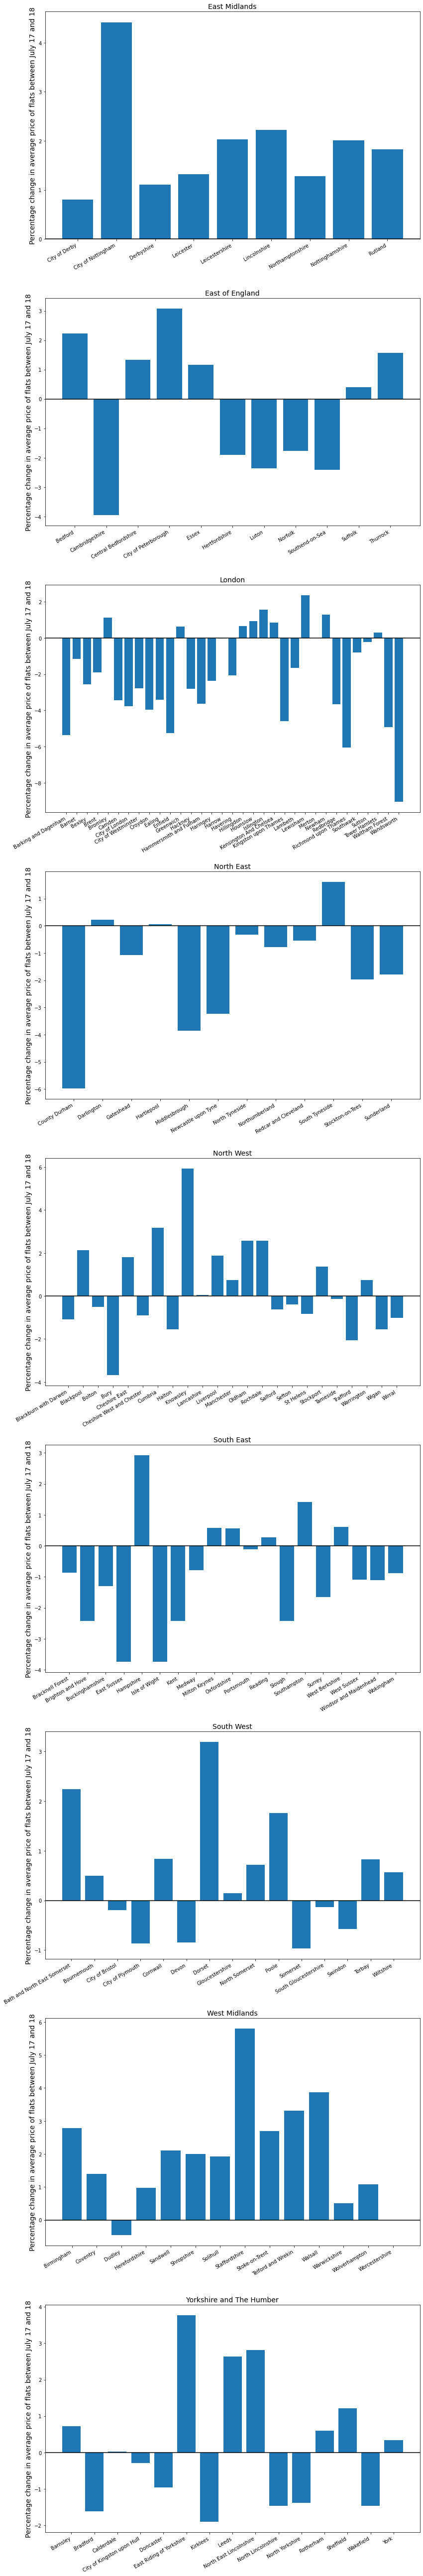

In [16]:
region_list = sorted(df17_18['RegionName'].unique().tolist())

fig2, ax2 = plt.subplots(nrows=len(region_list), figsize=(12,len(region_list)*8))

for i in region_list:
    ind = region_list.index(i)
    filt = df17_18['RegionName'] == i
    ax2[ind].bar(sorted(df17_18.loc[filt]['Area']),df17_18.loc[filt]['PriceChange_percent'])
    ax2[ind].set_title(i, size=14)
    ax2[ind].set_ylabel('Percentage change in average price of flats between July 17 and 18', size=14)
    ax2[ind].xaxis.set_tick_params(labelsize=10)
    ax2[ind].yaxis.set_tick_params(labelsize=10)
    ax2[ind].axhline(y=0, color='black', linestyle='-')
    plt.setp(ax2[ind].get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()

### C: Conclusions <a class="anchor" id="3c"></a>

Firstly, when looking at any general likeness between the plots it can be seen that there is less of a uniform trend shared between each region than with the previous analysis. There are some regions; like the East and West Midlands and the South West, that have seen a significant increase in the average price of flats in almost all areas of the regions between July 2017 and July 2018. A few regions like; the East of England, North West and Yorkshire and the Humber, that have seen a generally neutral net change in price in the whole region over this year period. However, there are some regions that have seen a strong decrease in average price in most areas, these include London, South East and North East.

We can see from London's distribution that this region has the most severe changes in average price. There are numerous boroughs in London, like Barking and Dagenham, Enfield and Richmond upon Thames, that have undergone a 5-6% price decrease over the year, which is equivalent to the most extreme price changes in any other area, like Stafforshire in the West Midlands (+6%) and County Durham in the North East (-6%). However, the most extreme price change in London (and in the whole dataset), belongs to the borough of Wandsworth, undergoing a decrease of 8% in average price. In contrast, flats in the Midlands, both East and West, have undergone an appreciation in average price in almost all areas.

## Part 4: Statistical Analysis <a class="anchor" id="fourth"></a>

In this section we cross-tabulate price increase and decrease with the region, and then use this to conduct a Chi-square ($\chi^2$) test of independence, to tell us whether there is an association between a price increase/decrease and the region.

### A: Cross-tabulation of price increase and decrease <a class="anchor" id="4a"></a>

To create a cross tabulation we need to convert the change in price into a categorical variable, which we do by looking at whether the price change is positive or negative and then assign either 'Increase' or 'Decrease' to this row in a new column in 'df17_18' called 'Increase/Decrease'.

In [17]:
IncreaseDecrease = []

for row in df17_18['PriceChange']:
    if row > 0: IncreaseDecrease.append('Increase')
    else: IncreaseDecrease.append('Decrease')
    
df17_18['Increase/Decrease'] = IncreaseDecrease
df17_18

,Area,Code,Flat2017,RegionCode,RegionName,Flat2018,PriceChange,PriceChange_percent,Increase/Decrease
0,Hartlepool,E06000001,65007.84170,E12000001,North East,61116.82158,-3891.02012,-5.985463,Decrease
1,Middlesbrough,E06000002,69163.06963,E12000001,North East,69313.90788,150.83825,0.218091,Increase
2,Redcar and Cleveland,E06000003,65507.80990,E12000001,North East,64802.79724,-705.01266,-1.076227,Decrease
3,Stockton-on-Tees,E06000004,83599.32806,E12000001,North East,83654.55272,55.22466,0.066059,Increase
4,Darlington,E06000005,87041.37973,E12000001,North East,83679.31818,-3362.06155,-3.862601,Decrease
...,...,...,...,...,...,...,...,...,...
146,Suffolk,E10000029,140278.18370,E12000006,East of England,142488.46480,2210.28110,1.575641,Increase
147,Surrey,E10000030,270116.52610,E12000008,South East,267144.69100,-2971.83510,-1.100205,Decrease
148,Warwickshire,E10000031,165676.94800,E12000005,West Midlands,167470.71860,1793.77060,1.082692,Increase
149,West Sussex,E10000032,193547.45490,E12000008,South East,191835.79530,-1711.65960,-0.884362,Decrease


We can then use the pandas crosstab function, using our columns 'RegionName' and 'Increase/Decrease' as our paramaters, to create our cross-tabulation, which we can then store in the variable name 'crosstab'.

In [18]:
crosstab = pd.crosstab(df17_18['Increase/Decrease'], df17_18['RegionName'])
crosstab

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Increase/Decrease,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


### B: Chi-square test <a class="anchor" id="4b"></a>

To conduct our chi-square test we can use the scipy.stats 'chi2_contingency' function, with 'crosstab' as a parameter, to give us our test statistic, degrees of freedom and p-value.

In [19]:
test_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.3f' % test_stat)
print('The p-value is %4.4f %%' % (100 * p_value))

There are 8 degrees of freedom
The chi-squared test statistic is 27.595
The p-value is 0.0558 %


### C: Final conclusions <a class="anchor" id="4c"></a>

From the chi-square test we get a p-value of 0.0558% which is less than 5% (significance level) so we reject the null hypothesis, meaning our result is statistically significant such that there is a significant difference between the distributions of price increase/decrease and region.

Using the chi-square distribution we get a critical value of around 15.507, which is significantly less than our test statistic of 27.595. Taking a 5% significance level means a 5% probability of our variables not being independent when they are. Due to the fact that our test statistic is greater than the critical value at 5% significance, we reject the null hypothesis; we reject the idea that price increase/decrease and region are independent. Thus we can conclude that there is some relationship between these categorical variables. It is important to note that we cannot conclude that the region causes a price increase or decrease, the independence test tells us whether there is a relationship betweent the variables or not, it doesn't tell us whether one variable causes another.